<a href="https://colab.research.google.com/github/Anjibabuthota1/machinelearning/blob/main/housepriceprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/house.csv")

In [ ]:
df.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0


In [ ]:
x=df.iloc[:,:-1]

In [ ]:
x

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1726,89,0,1,5,73133,7,6,2009,0,1,9311,1698,218,0,4
9996,44403,29,1,1,12,34606,9,4,1990,0,1,9061,1742,230,0,0
9997,83841,3,0,0,69,80933,10,10,2005,1,1,8304,7730,345,1,9
9998,59036,70,0,0,96,55856,1,3,2010,0,1,2590,6174,339,1,4


In [ ]:
y=df.iloc[:,-1:]

In [ ]:
y

,price
0,7559081.5
1,8085989.5
2,5574642.1
3,3232561.2
4,7055052.0
...,...
9995,176425.9
9996,4448474.0
9997,8390030.5
9998,5905107.0


In [ ]:
lr=LinearRegression()

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [ ]:
sc=StandardScaler()

In [ ]:
x1_train=sc.fit_transform(x_train)

In [ ]:
x1_test=sc.fit_transform(x_test)

In [ ]:
lr.fit(x1_train,y_train)

LinearRegression()

In [ ]:
y_pred=lr.predict(x1_test)

In [ ]:
r2=r2_score(y_test,y_pred)

In [ ]:
print(r2)

0.9973321124040403


In [ ]:
y_test = y_test["price"]
y_pred = y_pred.reshape(-1)

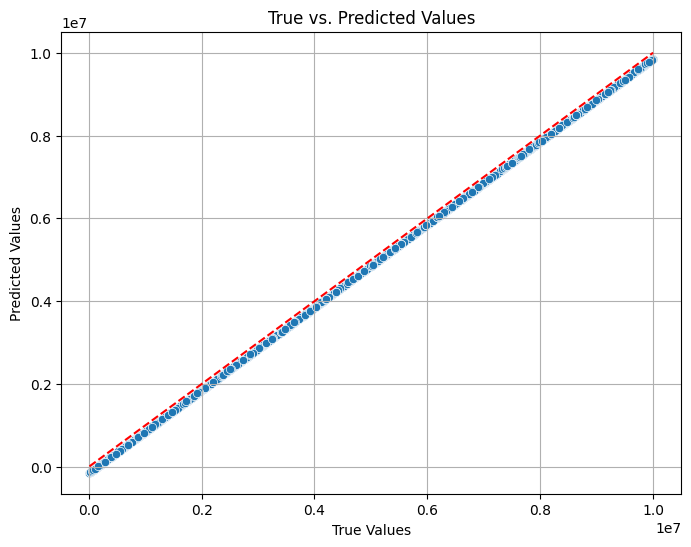

In [ ]:
plt.figure(figsize=(8, 6))
sn.scatterplot(x=y_test, y=y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Values')
plt.grid(True)
plt.show()


In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf

In [ ]:

tf_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(x1_train.shape[1],)),
    tf.keras.layers.Dense(1)])


In [ ]:
tf_model.compile(optimizer='adam', loss='mse')

In [ ]:
tf_model.fit(x1_train, y_train, epochs=100, batch_size=32, verbose=0)


In [ ]:
train_loss = tf_model.evaluate(x1_train, y_train, verbose=0)
test_loss = tf_model.evaluate(x1_test, y_test, verbose=0)
print(f'Training loss: {train_loss}')
print(f'Test loss: {test_loss}')

Training loss: 32771374317568.0
Test loss: 34243220602880.0


In [ ]:
mae = tf.keras.losses.MAE(y_test, y_pred)


In [ ]:
print(mae)

tf.Tensor(148406.91559523868, shape=(), dtype=float64)


In [ ]:
total_sum_of_squares = tf.reduce_sum(tf.square(y_test - tf.reduce_mean(y_test)))
residual_sum_of_squares = tf.reduce_sum(tf.square(y_test - y_pred))
r_squared = 1 - (residual_sum_of_squares / total_sum_of_squares)


In [ ]:
print(r_squared)

tf.Tensor(0.9973321124040403, shape=(), dtype=float64)
